In [0]:
#MOUNTING GOOGLE DRIVE FILES TO INTERACT WITH THEM
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# This IS THE MAIN MODEL and Training Program

In [0]:
#IMPORTING THE SET OF TOOLS NEEDED FOR REAL-TIME AUGMENTATION ON IMAGE DATA
from tensorflow.keras.preprocessing.image import ImageDataGenerator,DirectoryIterator

In [0]:
#IMPORITNG TOOLS TO BUILD A SEQUENTIAL MODEL
from tensorflow.keras.models import Sequential,model_from_json
#IMPORTING THE CORRESPONDING LAYERS TO BUILD OUR CONVOLUTIONAL NETWORK
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,Activation,BatchNormalization,MaxPool2D
#tensorboardcolab IS USED TO RUN TENSORFLOW ON GOOGLE COLAB
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
import time as tm

In [0]:
#ImageDataGenerator GENERAYES BATCHES OF TENSOR IMAGE DATA WITH REAL-TIME AUGMENTATION. 
#INCREASING THE NUMBER OF IMAGES IN OUR DATASET TO FACILITATE BETTER LEARNING
img_gen=ImageDataGenerator(rotation_range=360,\
                           width_shift_range=.3,\
                           height_shift_range=.2,\
                           shear_range=.4,\
                           zoom_range=0.3,\
                           horizontal_flip=True,\
                           vertical_flip=True,validation_split=.07,\
                           rescale=1.0/255)

In [0]:
#BUILDING OF THE MODEL USING CONVOLUTIONAL NEURAL NETWORK. THE MODEL WILL FIRST TRAIN ITSELF ON THE GIVEN TRAINIG DATASET, THE VALIDATION SET AND FINALLY
#WILL TEST ITSELF ON THE TEST SET.
#WE HAVE TRIED WITH SIX VERSIONS OF OUR MODEL AND HAVE FINALLY USED Model_v6(). 
#ALTERATION IS DONE AT EVERY TRAINING TO FACILIATE BETTER LEARNING.
#THE DROPOUT RATES, NUMBER OF LAYERS(EITHER INCREASING OR DECREASING), NUMBER OF EPOCHS HAVE BEEN REVISED SO AS TO OBATAIN BETTER RESULTS ON THE TEST SET.
#MODEL VERSION 1
def Model_v1():
  model=Sequential()
  #layer 1
  #THE IMAGES HAVE BEEN CONVERTED TO 128 X 128 RGB FORMAT
  model.add(Conv2D(32,(3,3), padding="same" , input_shape=(128,128,3)))
  model.add(MaxPool2D((3,3),(2,2), padding="same"))
  model.add(Activation("relu"))
  #layer 2
  model.add(Conv2D(32,(3,3), padding="same" ) ,)
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #layer 3
  model.add(Conv2D(64,(5,5), padding="valid" ))
  model.add(MaxPool2D((5,5),(4,4), padding="same"))
  model.add(Activation("relu"))
  #layer 4
  model.add(Dropout(.3))
  model.add(Conv2D(128,(3,3), padding="same" ))
  model.add(MaxPool2D((5,5),(5,5), padding="same"))
  model.add(Activation("relu"))
  #layer 5
  model.add(Conv2D(32,(3,3), padding="same" ))
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #Converting to Dense Layer
  model.add(Flatten())
  model.add(Dense(4096,activation="relu"))
  model.add(Dropout(.45))
  model.add(Dense(512,activation="relu"))
  #OUTPUT_layer
  model.add(Dense(6,activation="softmax"))
  
  return model




In [0]:
#MODEL COMPILATION AND OPTIMIZATION
MyModel=Model_v1()
MyModel.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer="adam")

In [0]:
#MODEL VERSION 2
def Model_v2():
  model=Sequential()
  #layer 1
  #THE IMAGES HAVE BEEN CONVERTED TO 128 X 128 RGB FORMAT
  model.add(Conv2D(32,(3,3), padding="same" , input_shape=(128,128,3)))
  model.add(MaxPool2D((3,3),(2,2), padding="same"))
  model.add(Activation("relu"))
  #layer 2
  model.add(Conv2D(32,(3,3), padding="same" ) ,)
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #layer 3
  model.add(Conv2D(64,(5,5), padding="valid" ))
  model.add(MaxPool2D((5,5),(4,4), padding="same"))
  model.add(Activation("relu"))
  #layer 4
  model.add(Dropout(.3))
  model.add(Conv2D(128,(3,3), padding="same" ))
  model.add(MaxPool2D((5,5),(5,5), padding="same"))
  model.add(Activation("relu"))
  #layer 5
  model.add(Dropout(.3))
  model.add(Conv2D(128,(3,3), padding="same" ))
  model.add(MaxPool2D((5,5),(5,5), padding="same"))
  model.add(Activation("relu"))
  #layer 6
  model.add(Conv2D(32,(3,3), padding="same" ))
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #Converting to Dense Layer
  model.add(Flatten())
  model.add(Dense(4096,activation="relu"))
  model.add(Dropout(.45))
  model.add(Dense(512,activation="relu"))
  #OUTPUT_layer
  model.add(Dense(6,activation="softmax"))
  
  return model




In [0]:
#MODEL VERSION 3
def Model_v3():
  model=Sequential()
  #layer 1
  model.add(Conv2D(32,(3,3), padding="same" , input_shape=(128,128,3)))
  model.add(MaxPool2D((3,3),(2,2), padding="same"))
  model.add(Activation("relu"))
  #layer 2
  model.add(Conv2D(32,(3,3), padding="same" ) ,)
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #layer 3
  model.add(Dropout(.3))
  model.add(Conv2D(128,(3,3), padding="same" ))
  model.add(MaxPool2D((5,5),(5,5), padding="same"))
  model.add(Activation("relu"))
  #layer 4
  model.add(Conv2D(32,(3,3), padding="same" ))
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #Converting to Dense Layer
  model.add(Flatten())
  model.add(Dense(4096,activation="relu"))
  model.add(Dropout(.45))
  model.add(Dense(512,activation="relu"))
  #OUTPUT_layer
  model.add(Dense(6,activation="softmax"))
  
  return model

In [0]:
#MODEL VERSION 4
def Model_v4():
  model=Sequential()
  #layer 1
  model.add(Conv2D(32,(3,3), padding="same" , input_shape=(128,128,3)))
  model.add(MaxPool2D((3,3),(2,2), padding="same"))
  model.add(Activation("relu"))
  #layer 2
  model.add(Conv2D(32,(3,3), padding="same" ) ,)
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #layer 3
  model.add(Conv2D(64,(5,5), padding="valid" ))
  model.add(MaxPool2D((5,5),(4,4), padding="same"))
  model.add(Activation("relu"))
  #layer 4
  model.add(Dropout(.45))
  model.add(Conv2D(128,(3,3), padding="same" ))
  model.add(MaxPool2D((5,5),(5,5), padding="same"))
  model.add(Activation("relu"))
  #layer 5
  model.add(Conv2D(32,(3,3), padding="same" ))
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #Converting to Dense Layer
  model.add(Flatten())
  model.add(Dense(4096,activation="relu"))
  model.add(Dropout(.45))
  model.add(Dense(512,activation="relu"))
  #OUTPUT_layer
  model.add(Dense(6,activation="softmax"))
  
  return model



In [0]:
#MODEL VERSION 5
def Model_v5():
  model=Sequential()
  #layer 1
  model.add(Conv2D(32,(3,3), padding="same" , input_shape=(128,128,3)))
  model.add(MaxPool2D((3,3),(2,2), padding="same"))
  model.add(Activation("relu"))
  #layer 2
  model.add(Conv2D(32,(3,3), padding="same" ) ,)
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #layer 3
  model.add(Conv2D(64,(5,5), padding="valid" ))
  model.add(MaxPool2D((5,5),(4,4), padding="same"))
  model.add(Activation("relu"))
  #layer 4
  model.add(Dropout(.3))
  model.add(Conv2D(128,(3,3), padding="same" ))
  model.add(MaxPool2D((5,5),(5,5), padding="same"))
  model.add(Activation("relu"))
  #layer 5
  model.add(Conv2D(32,(3,3), padding="same" ))
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #Converting to Dense Layer
  model.add(Flatten())
  model.add(Dense(4096,activation="relu"))
  model.add(Dropout(.3))
  model.add(Dense(512,activation="relu"))
  #OUTPUT_layer
  model.add(Dense(6,activation="softmax"))
  
  return model


In [0]:
def Model_v6():
  model=Sequential()
  #layer 1
  model.add(Conv2D(32,(3,3), padding="same" , input_shape=(128,128,3)))
  model.add(MaxPool2D((3,3),(2,2), padding="same"))
  model.add(Activation("relu"))
  #layer 2
  model.add(Conv2D(32,(3,3), padding="same" ) ,)
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #layer 3
  model.add(Conv2D(64,(5,5), padding="valid" ))
  model.add(MaxPool2D((5,5),(4,4), padding="same"))
  model.add(Activation("relu"))
  #layer 4
  model.add(Dropout(.3))
  model.add(Conv2D(128,(3,3), padding="same" ))
  model.add(MaxPool2D((5,5),(5,5), padding="same"))
  model.add(Activation("relu"))
  #layer 5
  model.add(Conv2D(64,(3,3), padding="same" ))
  model.add(MaxPool2D((3,3),(3,3), padding="same"))
  model.add(Activation("relu"))
  #Converting to Dense Layer
  model.add(Flatten())
  model.add(Dense(4096,activation="relu"))
  model.add(Dropout(.45))
  model.add(Dense(512,activation="relu"))
  #OUTPUT_layer
  model.add(Dense(6,activation="softmax"))
  
  return model



In [0]:
#MODEL COMPILATION AND OPTIMIZATION 
MyModel1=Model_v1()
MyModel1.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer="adam")

In [0]:
#img_gen.flow_from_directory TAKES THE PATH TO THE DIRECTORY AND CREATES BATCHES OF AUGMENTED DATA
train_path="/content/drive/My Drive/dataset_128"
gen_imgs=img_gen.flow_from_directory(train_path,\
                                     target_size=(128,128),\
                                     batch_size=32)
#tnsr_board=tb_colab. (log_dir=f"./log/{tm.time()}")

Found 252 images belonging to 6 classes.


In [0]:
#FITS THE DATA YIELDED BATCH BY BATCH USING PYTHON GENERATOR
#INCREASING THE NUMBER OF EPOCHS IMPROVES RESULTS
#tbc=TensorBoardColab()
MyModel1.fit_generator( gen_imgs,\
                      steps_per_epoch=400,\
                      epochs=4,\
                      validation_steps=50,\
                      validation_data=gen_imgs\
                      )

Epoch 1/4
400/400 [==============================] - 241s 604ms/step - loss: 1.0181 - accuracy: 0.6007 - val_loss: 0.6390 - val_accuracy: 0.7741
Epoch 2/4
400/400 [==============================] - 227s 567ms/step - loss: 0.4676 - accuracy: 0.8264 - val_loss: 0.3464 - val_accuracy: 0.8579
Epoch 3/4
400/400 [==============================] - 227s 567ms/step - loss: 0.3428 - accuracy: 0.8776 - val_loss: 0.2440 - val_accuracy: 0.9084
Epoch 4/4
400/400 [==============================] - 228s 571ms/step - loss: 0.2571 - accuracy: 0.9069 - val_loss: 0.3425 - val_accuracy: 0.8877


In [0]:
#!tensorboard --logdir=./log

In [0]:
#
save_dir="/content/drive/My Drive/PMD_Models"
model_name="/final_model_v1.h5"
weights_of_modelName="/Wgh_final_model_v1.h5"
MyModel1.save(save_dir+model_name)
MyModel1.save_weights(save_dir+weights_of_modelName)


model_json = MyModel1.to_json()
with open(save_dir+"/Final_model_v1.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
MyModel1.save_weights(save_dir+"/weights_for_jsonModel.h5")


In [0]:
!pip install --upgrade absl-py

Requirement already up-to-date: absl-py in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [0]:
# load json and create model
json_file = open(save_dir+"/Final_model_v1.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(save_dir+"/weights_for_jsonModel.h5")

In [0]:
loaded_model.compile(loss="categorical_crossentropy",metrics=['accuracy'],optimizer="adam")
hist=loaded_model.evaluate_generator(gen_imgs,steps=100,use_multiprocessing=True,verbose=1)

100/100 [==============================] - 51s 512ms/step - loss: 0.3437 - accuracy: 0.8869


In [0]:
print(hist[1])

0.8869123458862305


In [0]:
gen2=ImageDataGenerator(horizontal_flip=True,vertical_flip=True,shear_range=.03,rescale=1.0/255)
val_path="/content/drive/My Drive/Validation_Set_128"
eve_gen=gen2.flow_from_directory(val_path,target_size=(128,128),batch_size=64)
loaded_model.evaluate_generator(eve_gen, steps= 100, workers=4, use_multiprocessing=True, verbose=1)

Found 60 images belonging to 6 classes.
100/100 [==============================] - 28s 278ms/step - loss: 0.7764 - accuracy: 0.8368


[0.7763625383377075, 0.8368333578109741]

In [0]:
from tensorflow.keras.utils import model_to_dot,plot_model

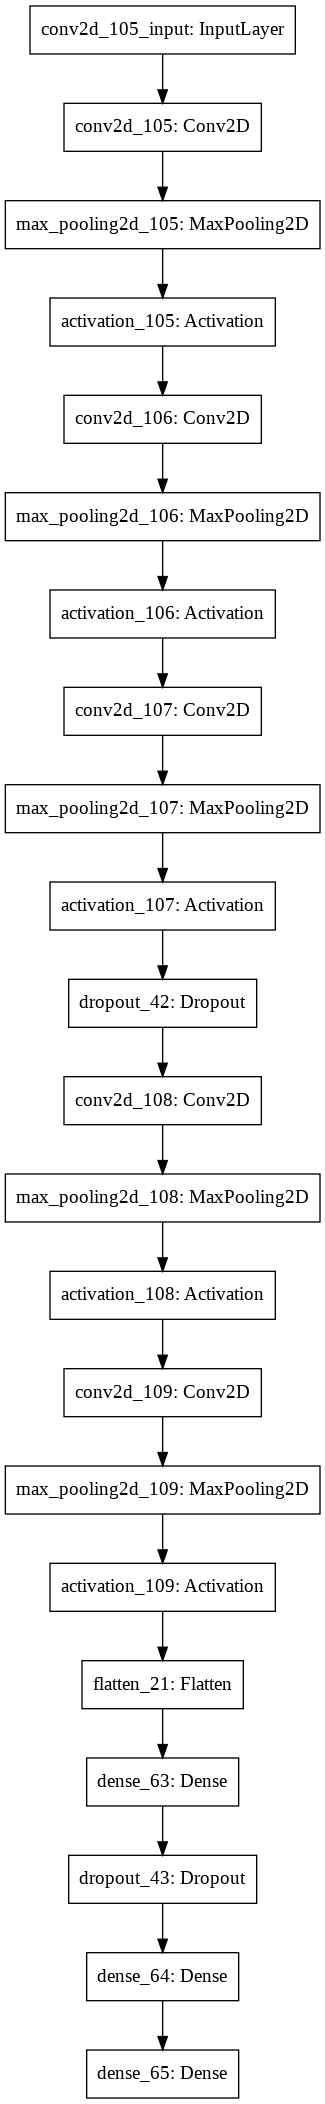

In [0]:
plot_model(MyModel1)